In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# apps = pd.read_csv('googleplaystore.csv')

apps = pd.read_csv(r'Google Play Store Apps.zip')

In [3]:
apple = pd.read_csv(r'Apple App Store Apps.zip')

In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230376 entries, 0 to 1230375
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   App_Id                   1230376 non-null  object 
 1   App_Name                 1230375 non-null  object 
 2   AppStore_Url             1230376 non-null  object 
 3   Primary_Genre            1230376 non-null  object 
 4   Content_Rating           1230376 non-null  object 
 5   Size_Bytes               1230152 non-null  float64
 6   Required_IOS_Version     1230376 non-null  object 
 7   Released                 1230373 non-null  object 
 8   Updated                  1230376 non-null  object 
 9   Version                  1230376 non-null  object 
 10  Price                    1229886 non-null  float64
 11  Currency                 1230376 non-null  object 
 12  Free                     1230376 non-null  bool   
 13  DeveloperId              1230376 non-null 

In [5]:
apps = apps.dropna()
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287191 entries, 0 to 2312942
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1287191 non-null  object 
 1   App Id             1287191 non-null  object 
 2   Category           1287191 non-null  object 
 3   Rating             1287191 non-null  float64
 4   Rating Count       1287191 non-null  float64
 5   Installs           1287191 non-null  object 
 6   Minimum Installs   1287191 non-null  float64
 7   Maximum Installs   1287191 non-null  int64  
 8   Free               1287191 non-null  bool   
 9   Price              1287191 non-null  float64
 10  Currency           1287191 non-null  object 
 11  Size               1287191 non-null  object 
 12  Minimum Android    1287191 non-null  object 
 13  Developer Id       1287191 non-null  object 
 14  Developer Website  1287191 non-null  object 
 15  Developer Email    1287191 non-n

In [6]:
apps = apps[apps['Size'] != 'Varies with device'] # remove 1637 rows

## Explore Dataset

In [7]:
# apps.describe()
# apps['Category'].unique()
# apps.info()
# apps.shape
apps.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,...,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,...,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35


# Select features and target

In [8]:
# features = ['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Last Updated']

features = ['Rating Count', 'Size', 'Installs', 'Price']

In [9]:
y = apps['Rating']
X = apps[features]

## Format Columns

In [10]:
## TODO Later if needed
def parse_date(obj):
    obj_str = str(obj)
    obj_str = obj_str.replace(',', '')
    return obj_str
    # mon_day_year = obj_str.split()

# all size in megabytes
def format_size(obj):
    obj_str = str(obj)
    if 'G' in obj_str:
        obj_str = obj_str.replace('G', '')
        obj_str = obj_str.replace(',', '')
        return float(obj_str) * 1000
    if 'M' in obj_str:
        obj_str = obj_str.replace('M', '')
        obj_str = obj_str.replace(',', '')
        return float(obj_str)
    obj_str = obj_str.replace('k', '')
    obj_str = obj_str.replace(',', '')
    return float(obj_str) / 1000

def format_installs(obj):
    obj_str = str(obj)
    obj_str = obj_str.replace('+', '')
    obj_str = obj_str.replace(',', '')
    return int(obj_str)

def format_price(obj):
    obj_str = str(obj)
    obj_str = obj_str.replace('$', '')
    return float(obj_str)

In [11]:
pd.options.mode.chained_assignment = None
# X['Reviews'] = pd.to_numeric(X['Reviews'])
X['Size'] = X['Size'].apply(format_size)
X['Installs'] = X['Installs'].apply(format_installs)
X['Price'] = X['Price'].apply(format_price)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250866 entries, 0 to 2312942
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Rating Count  1250866 non-null  float64
 1   Size          1250866 non-null  float64
 2   Installs      1250866 non-null  int64  
 3   Price         1250866 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 47.7 MB


In [13]:
# sns.countplot(x='Category', data=X, palette="mako_r")
# plt.rcParams["figure.figsize"] = (30,5)
# plt.xticks(rotation=45) 
# plt.show()

In [14]:
# X[X['App'].str.contains('Be Like Bro - Compilation')]

In [15]:
X.describe()

,Rating Count,Size,Installs,Price
count,1.250866e+06,1.250866e+06,1.250866e+06,1.250866e+06
mean,3.196095e+03,2.144003e+01,1.616856e+05,1.070417e-01
std,1.159034e+05,2.573196e+01,4.191622e+06,2.426627e+00
min,0.000000e+00,3.300000e-03,0.000000e+00,0.000000e+00
25%,0.000000e+00,5.800000e+00,1.000000e+02,0.000000e+00
50%,7.000000e+00,1.200000e+01,5.000000e+02,0.000000e+00
75%,5.600000e+01,2.800000e+01,5.000000e+03,0.000000e+00
max,5.602542e+07,1.500000e+03,1.000000e+09,4.000000e+02


In [16]:
X.Price.unique()

array([  0.      ,   4.99    ,   2.99    ,   0.99    ,   1.99    ,
         4.49    ,   3.99    ,  99.99    ,   5.49    ,  41.99    ,
         5.29    ,  19.99    ,   5.99    ,   9.99    ,  39.99    ,
         8.99    ,  28.99    ,   3.49    ,   2.49    ,   1.49    ,
        72.95    ,  48.95    ,   3.67    ,   1.942142,   6.99    ,
        54.99    ,  13.99    ,  10.99    ,   7.49    ,   8.49    ,
        24.99    , 119.99    ,   6.49    ,  65.99    ,   1.      ,
         5.92    ,   9.49    ,  35.99    ,   7.99    ,  25.19    ,
        32.99    ,   1.09    ,   1.07    ,   3.45    ,   1.86    ,
         5.458441,  14.99    ,  12.99    ,  26.99    ,  23.99    ,
        43.99    ,   2.183376,  11.07    ,  64.99    ,  24.46    ,
         4.      ,  15.99    ,  59.99    ,  16.46    ,   1.47    ,
         1.987481,   1.05    ,   3.11    ,  50.28    ,   2.1     ,
         1.65    ,   1.84    ,  34.99    ,   2.03    ,   2.93    ,
        10.24    ,   1.8     ,  11.99    ,   0.895283,   1.6  

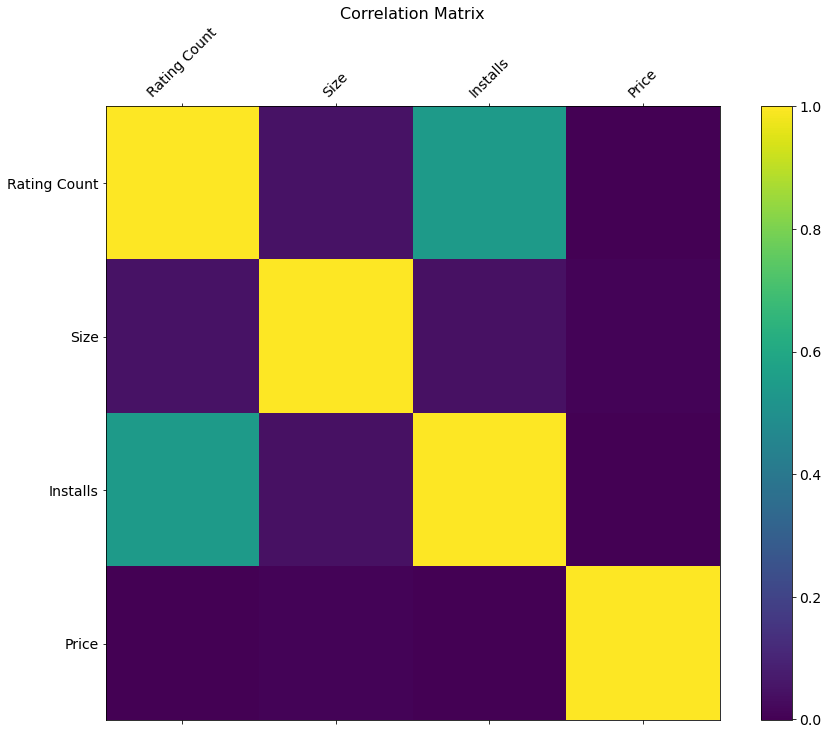

In [17]:
f = plt.figure(figsize=(15, 11))
plt.matshow(X.corr(), fignum=f.number)

plt.xticks(range(X.select_dtypes(['number']).shape[1]), X.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(X.select_dtypes(['number']).shape[1]), X.select_dtypes(['number']).columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

plt.show()

In [18]:
X.corr()

,Rating Count,Size,Installs,Price
Rating Count,1.000000,0.047485,0.544825,-0.000956
Size,0.047485,1.000000,0.044628,0.009313
Installs,0.544825,0.044628,1.000000,-0.001626
Price,-0.000956,0.009313,-0.001626,1.000000


In [19]:
y.shape

(1250866,)

In [20]:
X.shape

(1250866, 4)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [22]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250866 entries, 0 to 2312942
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Rating Count  1250866 non-null  float64
 1   Size          1250866 non-null  float64
 2   Installs      1250866 non-null  int64  
 3   Price         1250866 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 47.7 MB


In [24]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)


scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in [40, 50, 60, 70, 80]}
best_tree_size = min(scores, key=scores.get)

In [25]:
best_tree_size

80

In [26]:
scores

{40: 0.2706506299651317,
 50: 0.2703769154729287,
 60: 0.2699339910095316,
 70: 0.26970235523626485,
 80: 0.2695716428173963}

In [27]:
# Define model
app_model = DecisionTreeRegressor(max_leaf_nodes=40, random_state = 1)
# Fit model
app_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = app_model.predict(val_X)

mean_absolute_error(val_y, val_predictions)

0.27065062996513195

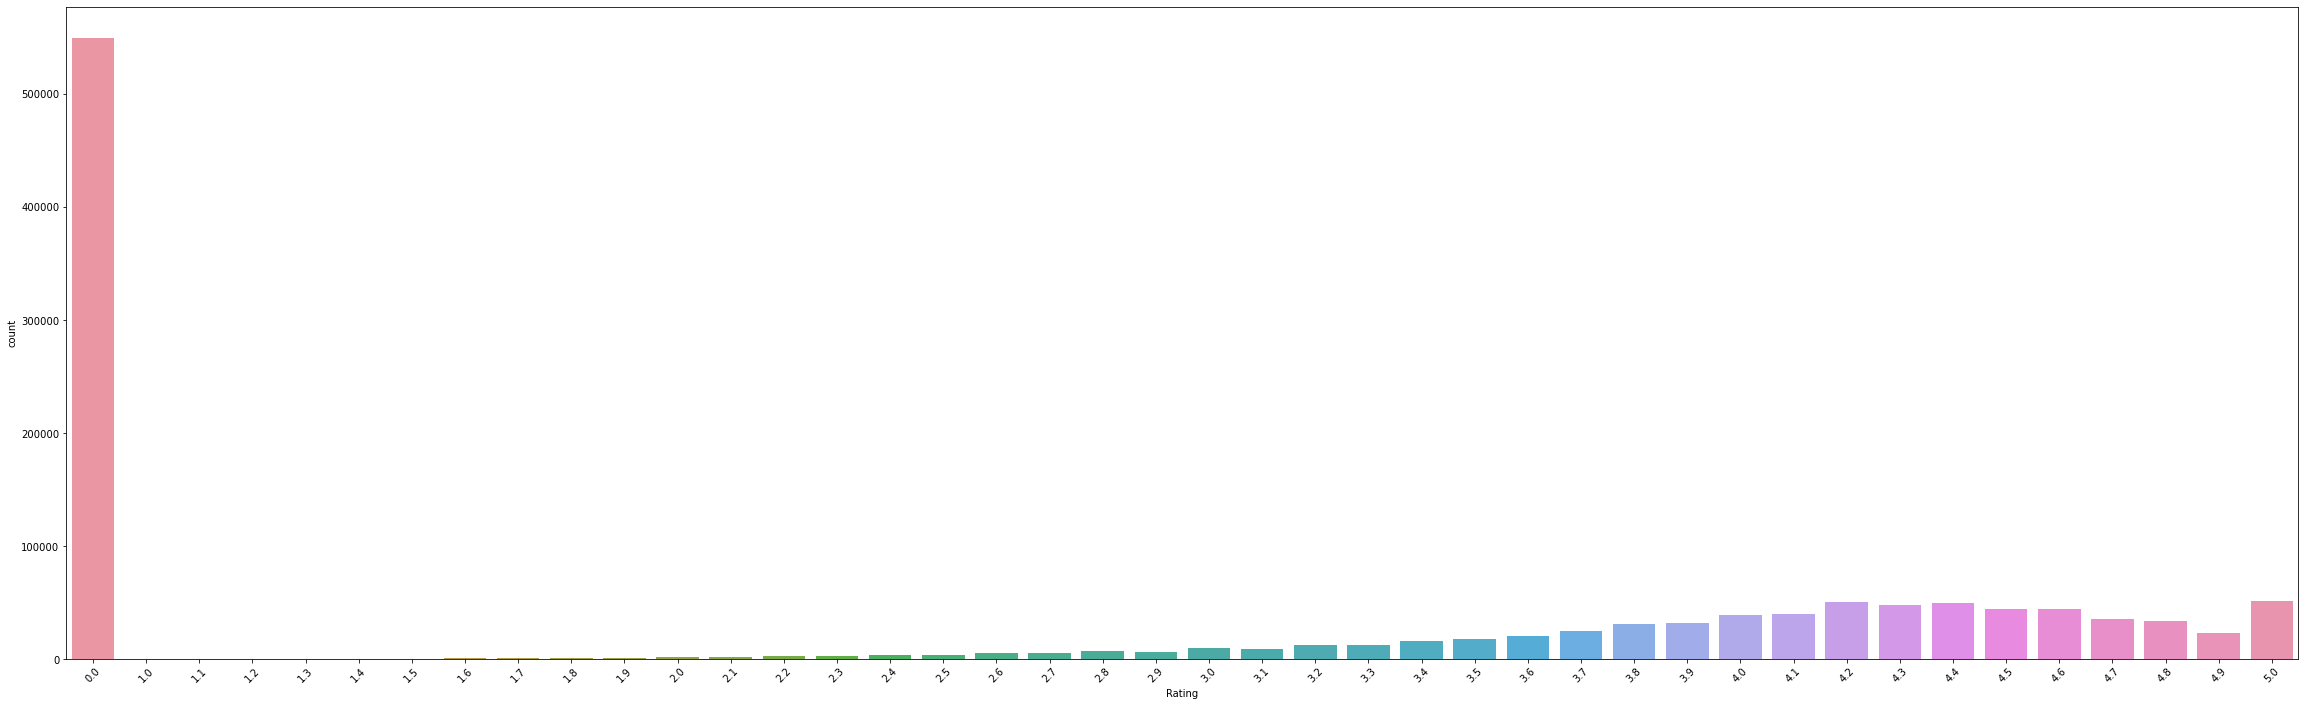

In [35]:
sns.countplot(x='Rating', data=apps)
plt.rcParams["figure.figsize"] = (40,12)
plt.xticks(rotation=45) 
plt.show()

### As you see above, a LOT of apps have 0 rating. This has significantly skewed our result. Let's remove all apps with zero rating and try again.

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
app_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, app_preds))

0.290004339780346


### Strange

After 10-15 minutes, decision tree returned a wrose absolute error in compare to decision tree.
A possible explanation could be that decision tree is overfitting with a high value of max_leaf_node.

It is important to note that more training data has made the model more robust. Previous dataset, googleplaystore.csv , had ~7K rows but the new dataset, Google Play Store Apps.zip , has ~1.2Million rows 

In [31]:
y.describe()

count    1.250866e+06
mean     2.292478e+00
std      2.094201e+00
min      0.000000e+00
25%      0.000000e+00
50%      3.200000e+00
75%      4.300000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [32]:
val_X.describe()

,Rating Count,Size,Installs,Price
count,3.127170e+05,312717.000000,3.127170e+05,312717.000000
mean,3.475594e+03,21.484613,1.577459e+05,0.104576
std,1.661351e+05,25.986600,3.899359e+06,2.524362
min,0.000000e+00,0.006300,0.000000e+00,0.000000
25%,0.000000e+00,5.800000,1.000000e+02,0.000000
50%,7.000000e+00,12.000000,5.000000e+02,0.000000
75%,5.600000e+01,28.000000,5.000000e+03,0.000000
max,5.602542e+07,1500.000000,1.000000e+09,399.990000


# Making actual predictions on google play store 🔮

In [33]:
d = {'Rating Count': [12], 'Size': [5], 'Installs': [500], 'Price': [500]}

df = pd.DataFrame(data=d)

In [34]:
forest_model.predict(df)

array([4.13635758])

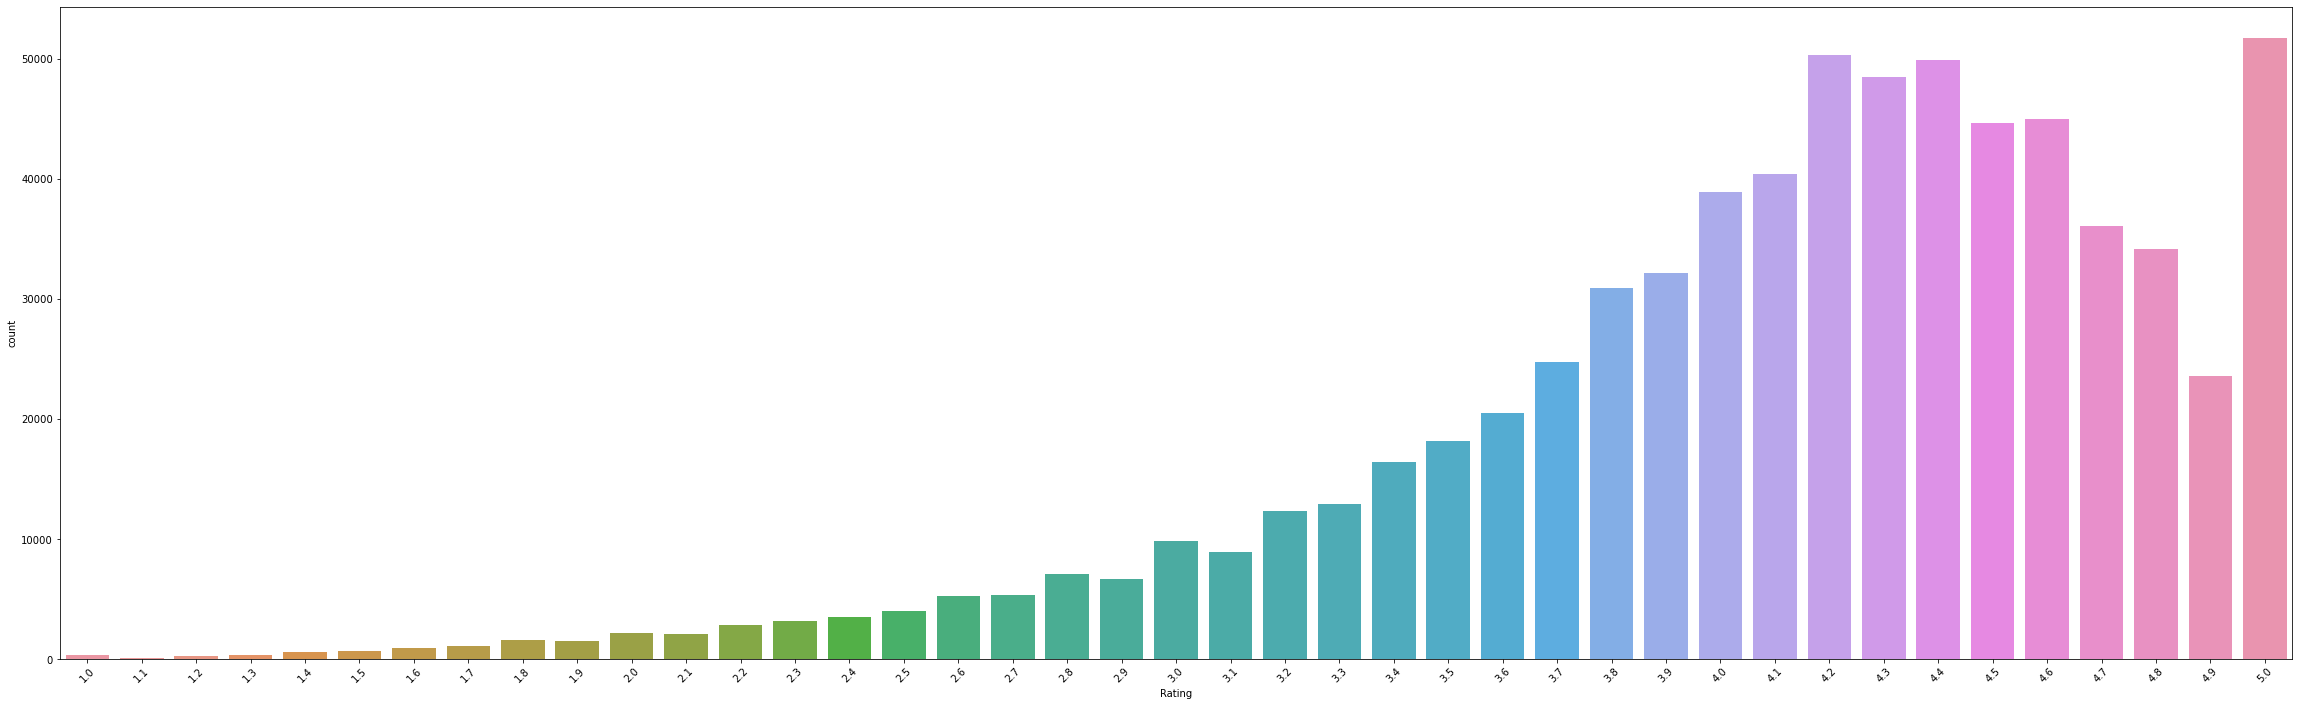

In [39]:
apps = apps[apps['Rating'] > 0]

sns.countplot(x='Rating', data=apps)
plt.rcParams["figure.figsize"] = (40,12)
plt.xticks(rotation=45) 
plt.show()


# Decision Tree: apps with > 0 rating

In [65]:
y = apps['Rating']
X = apps[features]

pd.options.mode.chained_assignment = None
# X['Reviews'] = pd.to_numeric(X['Reviews'])
X['Size'] = X['Size'].apply(format_size)
X['Installs'] = X['Installs'].apply(format_installs)
X['Price'] = X['Price'].apply(format_price)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)


# Define model
app_model = DecisionTreeRegressor(max_leaf_nodes=40, random_state = 1)
# Fit model
app_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = app_model.predict(val_X)

print(mean_absolute_error(val_y, val_predictions))

app_model.score(val_X, val_y)

0.48296996831144134


0.12538901661071955

# Random Forest: apps with > 0 rating

In [43]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
app_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, app_preds))

0.5181917957415826


In [61]:

d = {'Rating Count': [40], 'Size': [19], 'Installs': [100000], 'Price': [0]}
df = pd.DataFrame(data=d)
forest_model.predict(df)

array([4.06148248])

# very low score 🚩 

In [62]:
forest_model.score(val_X, val_y)

-0.008810997806986354

In [71]:
from sklearn.neighbors import NearestNeighbors

In [67]:
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(train_X, train_y)

NearestNeighbors(n_neighbors=2)

In [ ]:
neigh.score(val_X, val_y)

AttributeError: 'NearestNeighbors' object has no attribute 'score'

# Support Vector Machine SVM

In [72]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(train_X, train_y)

In [ ]:
predictionsSVM = regr.predict(val_X)
mean_absolute_error(val_y, predictionsSVM)